In [2]:
#Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Style of Plots
plt.style.use('fivethirtyeight')

# Read files
df = pd.read_csv("Plane Crash dataset.csv")

In [5]:
#Total Fatalities
print("all fatalities", df["Total fatalities"].sum())

category = 'Year'
numeric = 'Total fatalities'

# group fatalities by cause:  https://datagy.io/pandas-groupby/
gb = df.groupby(category)[numeric].sum()
print("groupby as Series:") 
print(gb, type(gb))

# The issue (for me anyway) is that gb is not a dataframe, the left most "column"
# is its index (which can be non-numeric) and the right (unnamed) column has
# the actual values. Thing is you can't plot with that (x=index y=unnamed) so
# I'll create a new, separate df for plotting:

d = {category: gb.index,
      numeric: gb.values}
dfgb = pd.DataFrame(d)
dfgb


all fatalities 158735
groupby as Series:
Year
1918      29
1919      50
1920      77
1921      78
1922     105
        ... 
2018    1039
2019     588
2020     480
2021     414
2022     199
Name: Total fatalities, Length: 105, dtype: int64 <class 'pandas.core.series.Series'>


,Year,Total fatalities
0,1918,29
1,1919,50
2,1920,77
3,1921,78
4,1922,105
...,...,...
100,2018,1039
101,2019,588
102,2020,480
103,2021,414


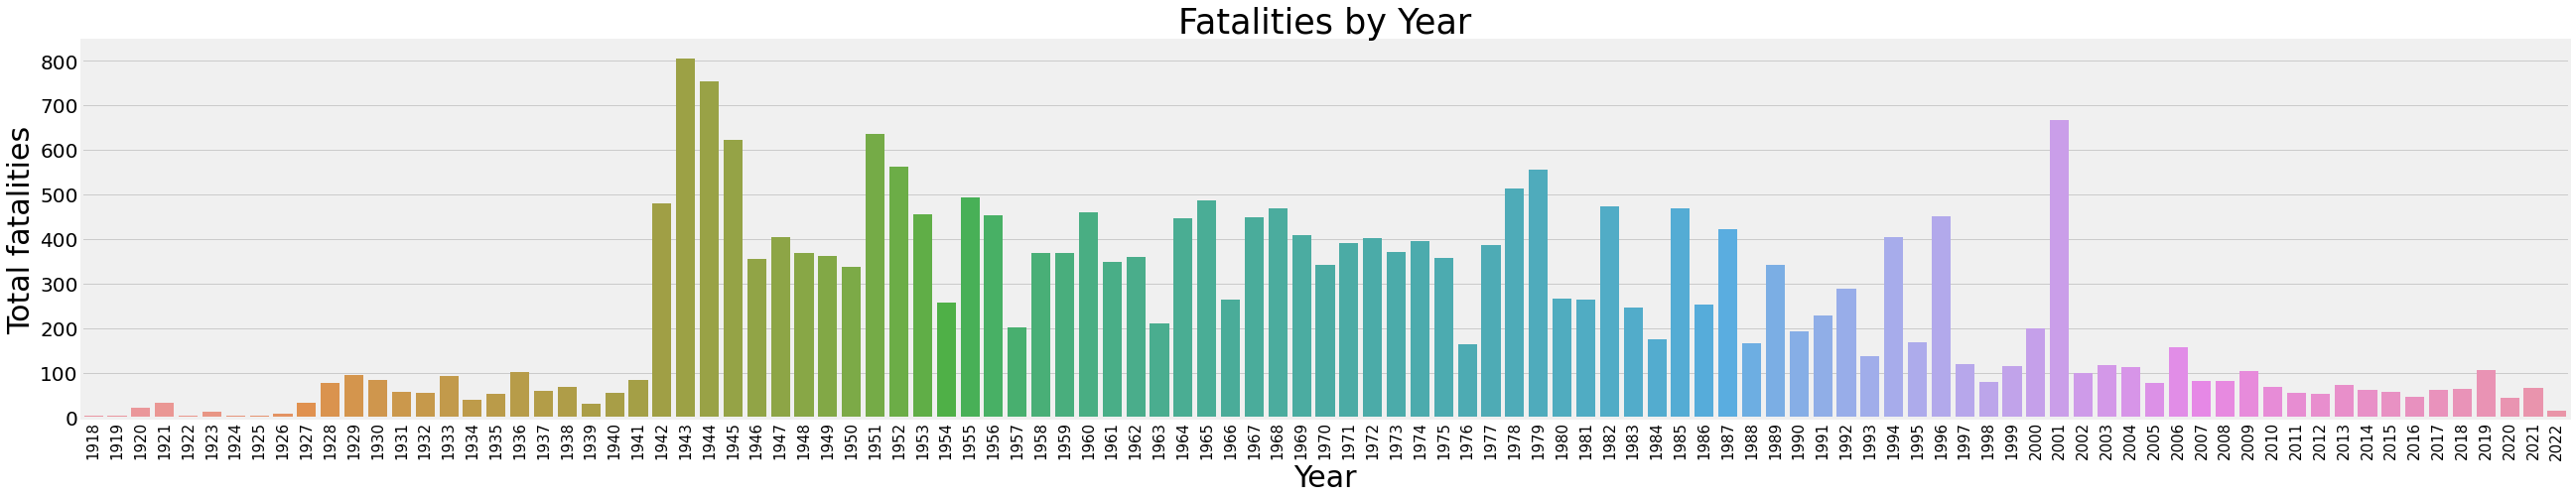

In [22]:
# Total deaths by year
name = 'Deaths_By_Year_Bar'
fig, ax = plt.subplots(figsize=(40, 7))  # new plot

ax = sns.barplot(x="Year", y="Total fatalities", # which columns for x and y
                    data=dfgb, # in which dataframe
                    ci=0, # no error bars (much faster!)
                    ) 


plt.xticks(rotation=90)
ax.tick_params(axis='x', which='both', labelsize=8)

ax.set_title("Fatalities by Year", fontsize='35')

ax.set_ylabel(ax.get_ylabel(), fontsize='30')
ax.set_xlabel(ax.get_xlabel(), fontsize='30')
plt.yticks(fontsize=20)
plt.xticks(fontsize=15)
plt.show()

fig = ax.get_figure()
fig.savefig("images/"+name + ".png") 
